<a href="https://colab.research.google.com/github/Vedant0402/EDA_reusable_code/blob/main/EDA(Day-5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 5 — Univariate Analysis (Numerical + Categorical Features)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Observation --> Dataset contains 4 numerical columns and a categorical column

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Univariate Analysis (Numerical Columns)

In [5]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("num_cols: ", num_cols)

num_cols:  Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


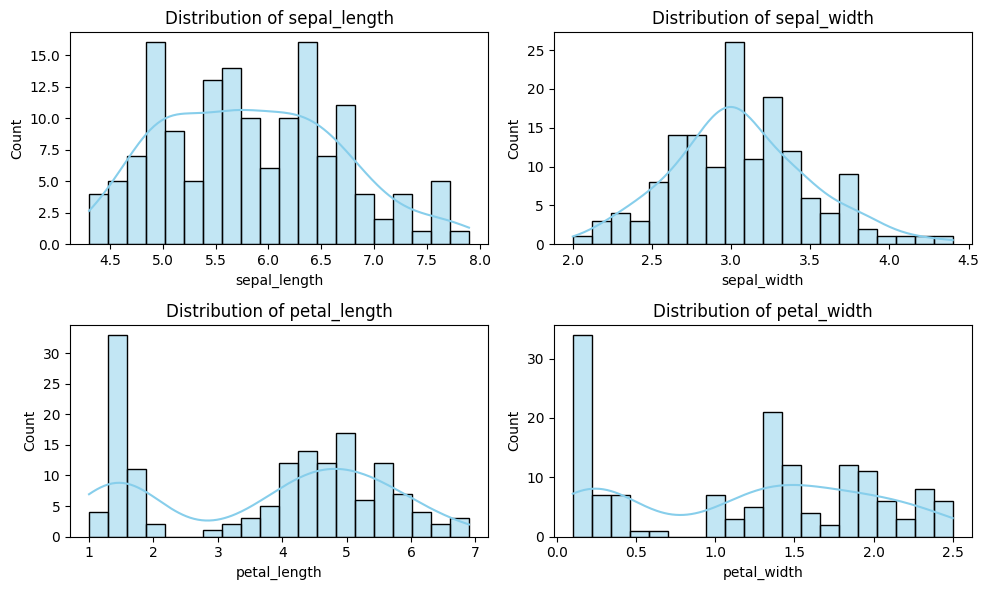

In [6]:
# Visualize

plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Obervation --> Here it is visible some normal, skewed distribution

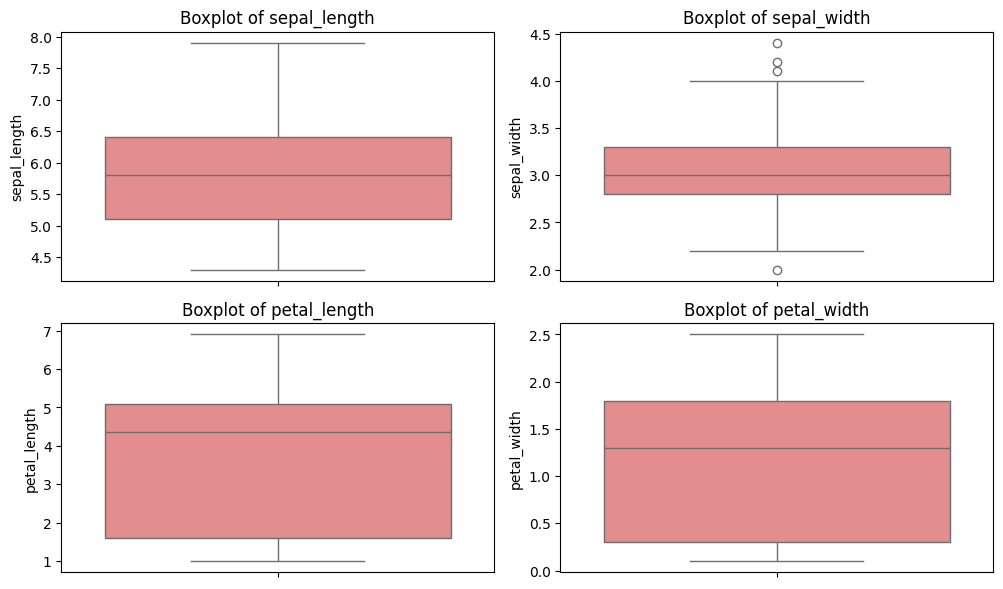

In [7]:
# Outliers detection

plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

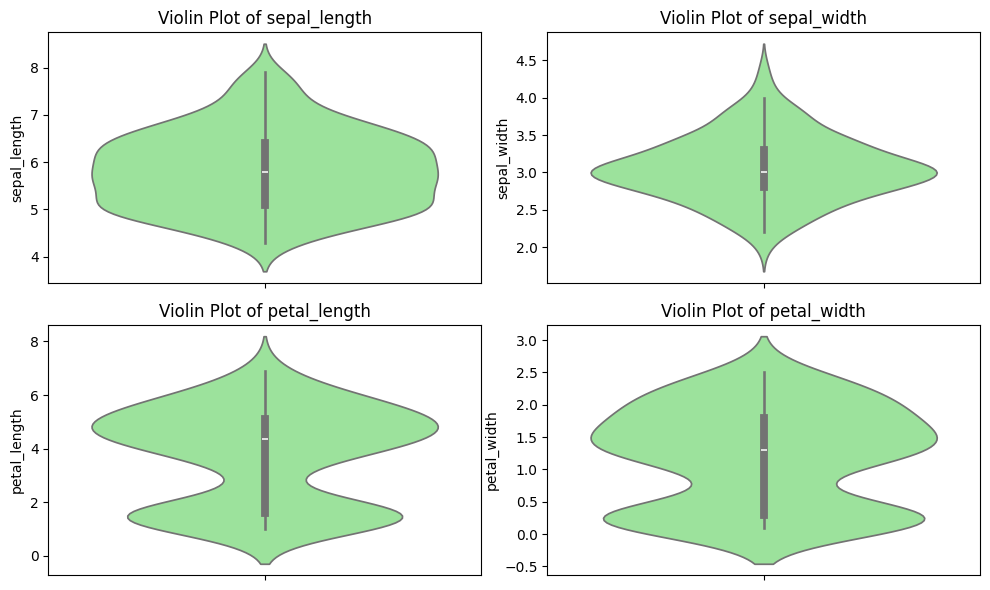

In [8]:
# Voilin plot

plt.figure(figsize=(10,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(y=df[col], inner="box", color='lightgreen')
    plt.title(f"Violin Plot of {col}")
plt.tight_layout()
plt.show()

In [9]:
# Skewness & Kurtosis

from scipy.stats import skew, kurtosis

for col in num_cols:
    print(f"{col}: Skewness = {skew(df[col]):.2f}, Kurtosis = {kurtosis(df[col]):.2f}")

sepal_length: Skewness = 0.31, Kurtosis = -0.57
sepal_width: Skewness = 0.32, Kurtosis = 0.18
petal_length: Skewness = -0.27, Kurtosis = -1.40
petal_width: Skewness = -0.10, Kurtosis = -1.34


### Univariate Analysis (Categorical Columns)

In [11]:
cat_cols = df.select_dtypes(include='object').columns
print("cat_cols: ", cat_cols)

cat_cols:  Index(['species'], dtype='object')


/tmp/ipython-input-3951830039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


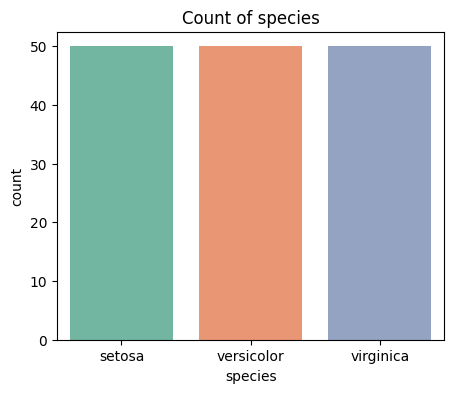

In [12]:
for col in cat_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count of {col}")
    plt.show()

#### Obervation --> Balance in categorical data

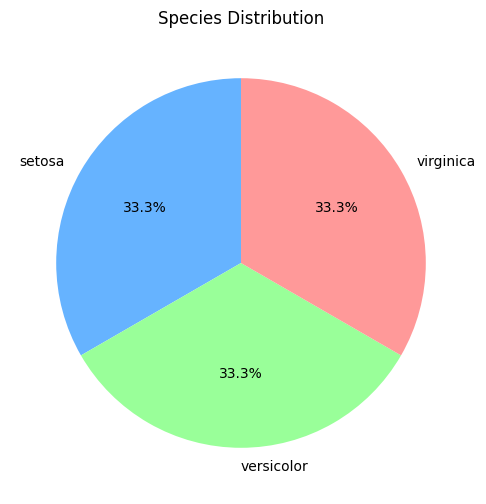

In [13]:
plt.figure(figsize=(6,6))
df['species'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title("Species Distribution")
plt.ylabel("")
plt.show()